# Healthcare Regulation

## Theory


### Payoff for every survied patient after 1 year of hospitalization (M1Y regulation - Mortality 1-year)

As in previous article, we will consider 1-D model with 2 hospitals along line with "passive" dispathcer. It means, that if no one hospital want to accept patient, dispatcher distribute patient to closest one. 

Now let modify players payoff functions to foster inter-hospital collaboration for load balancing. For that purpose, we define utility function of hospital as difference between payoff to survived patient and medical expences. This payoff function encourages hospitals to take only those patients whom they can cure.

We will define $P_{m1y}$ as probability of 1-year mortality, depending on time to treatment using https://www.ahajournals.org/doi/10.1161/01.CIR.0000121424.76486.20

![image.png](https://www.ahajournals.org/cms/attachment/216abeea-33ef-4828-9b36-3a49ed40e236/9ff1.jpg)

$$ P_{m1y}(t) = 0.000043 \cdot x^2 + 0.0045 \cdot x + 2.86 $$ 

Time to treatment was calculated from symptom onset to first balloon inflation (true ischemic time). It means that time to treatment may calculated as
$$ T_{treatment}(\lambda) = T_{transp}(\lambda) + T_{queue}(\lambda) + T_{surgery} $$
 
Let government revenue for cured patient be $ R_{cured} $.

Medical expences consist of transportation and operation costs.
$$ E_{med} = C_{transp} + C_{op} $$

So modified utility function for hospital will look like:

$$ u_i = \lambda_i \cdot [(1-P_{m1y}(T_{treatment}) \cdot R_{cured} - E_{med}] $$


Text(0.5,1,'Процент смертности пациентов ОКС в течение года в зависимости от времени лечения')

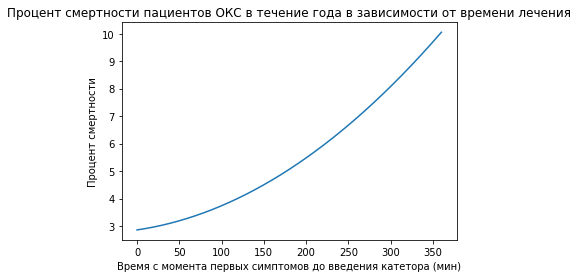

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def p_m(t):
    return 0.000043 * t ** 2 + 0.0045 * t + 2.86

x = np.linspace(0, 360, 1000)
y = p_m(x)
plt.plot(x, y)
plt.xlabel('Время с момента первых симптомов до введения катетора (мин)')
plt.ylabel('Процент смертности')

plt.title('Процент смертности пациентов ОКС в течение года в зависимости от времени лечения')

### Payoff for every survied patient during treatment (D2B regulation - Door-to-balloon)

As in previous case, government will motivate hospitals rewarding for every cured patient. But now cured patient means patient, that survived after hospitalization and treatment. 

We will use table from https://www.bmj.com/content/338/bmj.b1807 and regression to interpolate probability of mortality depending on door-to-balloon time.


![image.png](src/images/regulation/Door-to-balloon time.PNG)

[[ 0.00000000e+00  1.03594973e-02 -1.91991297e-04  4.61775189e-06
  -2.11879941e-08  2.83204328e-11]]
[2.78396809]


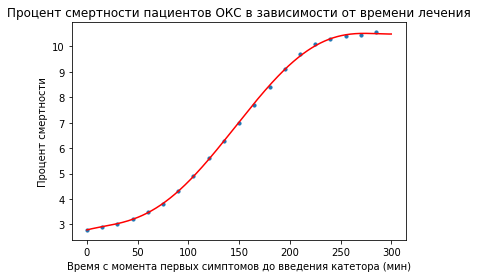

In [41]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

d = 5

x = np.array(np.arange(0, 300, 15))
y = np.array([2.8, 2.9, 3, 3.2, 3.5, 3.8, 4.3, 4.9, 5.6, 6.3, 7, 7.7, 8.4, 9.1, 9.7, 10.1, 10.3, 10.4, 10.45, 10.55])

x = x[:, np.newaxis]
y = y[:, np.newaxis]

poly_features = PolynomialFeatures(degree=d)

x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

xs = np.linspace(0, 300, 1000)
xs = xs[:, np.newaxis]
xs_poly = PolynomialFeatures(degree=d).fit_transform(xs)

ys = model.predict(xs_poly)


plt.scatter(x, y, s=10)
plt.plot(xs, ys, color='r')

plt.xlabel('Время с момента первых симптомов до введения катетора (мин)')
plt.ylabel('Процент смертности')

plt.title('Процент смертности пациентов ОКС в зависимости от времени лечения')

print(model.coef_)
print(model.intercept_ )

We will define probability of mortality during treatment as 

$$ P_{mt}(t) = \begin{cases} 2.83204328e^{-11} t^5 - 2.11879941e^{-08} t^4 + 4.61775189e^{-06} t^3 -  1.919912e^{-04} t^2 + 1.035949e^{-02} + 2.78396809, & \mbox{if } t \leq 300 \\
10.1, & \mbox{if } t \gt 300 \end{cases} $$

It is also necessary to note, that some of patients, delivered to hospital may die during waiting in queue. We take this into account in the model, subtracting from the flow of patients part, that would not have been cured (however, the hospital still has expenses for them).

$$ \lambda_i^{cured} = \lambda_i \cdot (1 - P_{mt}(T_{treatment}(\lambda_i)) $$

The hospital will receive a reward for all cured patients, and spend on operating expenses. Patients who could not be cured by the hospital will also be spent on transportation.

$$ u_i = \lambda_i^{cured} \cdot (R_{cured} - E_{op}) - \lambda_i \cdot E_{op} $$




### Dispatcher Regulation

City Regulation of healthcare were reviewed in [Dispathcer Notebook](Dispatcher Agent.ipynb)

## Results

#### Hospital with D2B regulation

##### Pure Nash Equilibrium with high revenue

![image.png](src/images/regulation/Hospital With D2B regulation Nash Equ high revenue.png)

##### D2B Pure Nash Equilibrium with low revenue

![image.png](src/images/regulation/Hospital With D2B regulation Nash Equ low revenue.png)

##### D2B Mixed Nash Equilibrium high revenue
![image.png](src/images/regulation/Hospital With D2B regulation Mixed Nash Equ high revenue.png)


##### D2B Mixed Nash Equilibrium low revenue
![image.png](src/images/regulation/Hospital With D2B regulation Mixed Nash Equ low revenue.png)


#### Hospital with M1Y regulation


##### Pure Nash Equilibrium high revenue

![image.png](src/images/regulation/Hospital with 1YM regulation Mixed Nash Equ high revenue.png)


##### M1Y Pure Nash Equilibrium low  revenue

![image.png](src/images/regulation/Hospital with 1YM regulation Mixed Nash Equ low revenue.png)

##### M1Y Mixed Nash Equilibrium high revenue

![image.png](src/images/regulation/Hospital with 1YM regulation Mixed Nash Equ high revenue.png)

##### M1Y Mixed Nash Equilibrium low revenue

![image.png](src/images/regulation/Hospital with 1YM regulation Mixed Nash Equ low revenue.png)

It is easy to see that with low revenue, hospitals act carefully, often redirecting patients. With a high amount of remuneration, all on a turn - hospitals act greedily, taking all patients for themselves.

To assess behaviour of hospitals, we will look at global optimal solution. The primary goal of hospitals is to save the lives of patients, so we will evaluate the choice of players' strategies as the percentage of patients who were cured, among all admitted. Obviously, we need to maximize this metric. 
$$ G_i = \frac{\lambda_i^{cured}}{\lambda_i} $$ 

Next, we will look how new metric how the new metric behaves with different number of servers, the value of the flow and the chosen strategy

#### Cured rate for D2B
![image.png](src/images/regulation/Hospital with D2B regulation cured rate.png)

##### Cured rate for M1Y

![image.png](src/images/regulation/Hospital with M1Y regulation cured rate.png)

Obviously, with more patient flow, percentage of cured patients decreases. Also, when number of servers are different, strategies with rejection are more profitable

### Global Equilibrium for D2B

![image.png](src/images/regulation/Hospital with D2B regulation Global Equ.png)

#### Global Equilibrium for M1Y

![image.png](src/images/regulation/Hospital with M1Y regulation Global Equ.png)

## Comparision of regulations

Now we will compare M1Y, D2B and basic model (without regulation - each arrived patient makes a profit to hospital) on proximity to optimal global solution. To achieve this, we will calculate the proportion of matching strategies with different $\mu$ and $\lambda$, varying revenue value

![image.png](src/images/regulation/Regulation comparision.png)

We can see, that for cases with same number of servers in hospitals it more profitable to use higher revenue, because hospitals will use Accept strategy (and there no needs in redirection of patients, because they can be distributed unfiromly)

For other cases, lower value of revenue stimulate hospitals to play Reject strategy, and it's rational because system need to balance patients. But, for example in case N=[3,2] nash equilibrium of base model is closer to global solution, than both modified model. 

It should be noted that we are interested in the upper left corner less than the middle and lower part of the graph - with a small flow and fast treatment any strategy will cope well. Therefore, we will look at the closeness of Nash solutions to global solutions in the case of a large load - when $\lambda \geq \mu $

#### Comparitions of regulations in high load ($\lambda \geq \mu$)

![image.png](src/images/regulation/Regulation comparision for high load.png)

In conclusion note, that both of Door-to-ballon time and 1 Year Mortality regulation methods well brought the optimal solution